In [1]:
# pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-7fl2iz38
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-7fl2iz38
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


: 

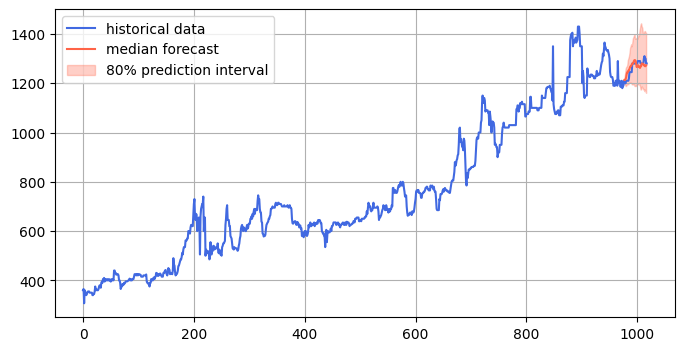

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="mps",
  torch_dtype=torch.bfloat16,
)

# df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df = pd.read_csv("delhi_data.csv")
df= df[['Date', 'Price']]
index= int(0.96 * len(df))
df_train = df[:index]
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df_train["Price"])
prediction_length = int(len(df) * 0.04)
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df_train), len(df_train) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["Price"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


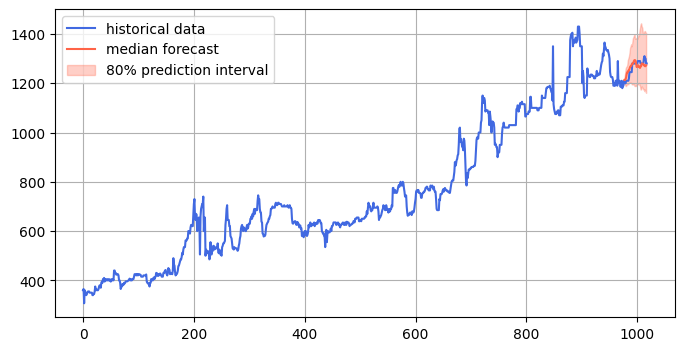

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(df["Price"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [23]:
forecast_index

range(977, 1017)

<ipython-input-60-e402d63dab5e>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


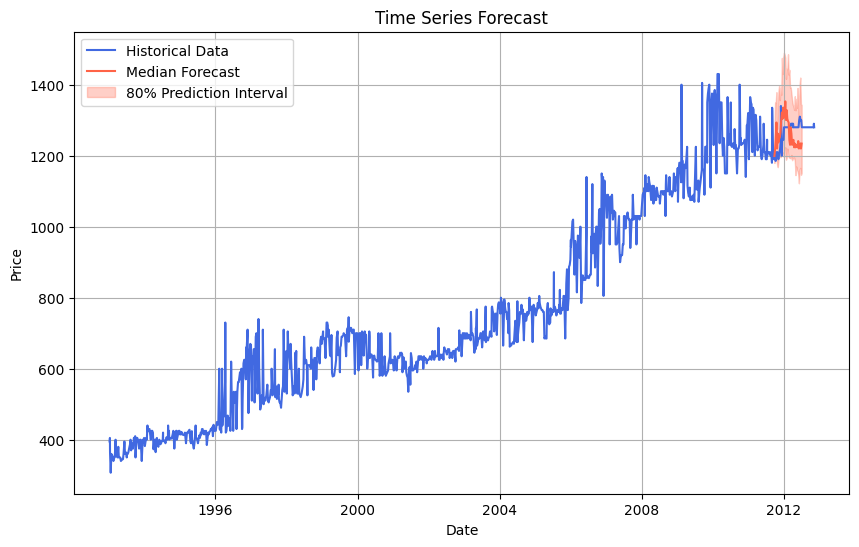

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

# Initialize the pipeline
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

# Load data
df = pd.read_csv("/content/delhi_data.csv")
df = df[['Date', 'Price']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Split the data into training and test sets
index = int(0.96 * len(df))
df_train = df[:index]
df_test = df[index:]

# Prepare the context tensor
context = torch.tensor(df_train["Price"].values, dtype=torch.float32)
prediction_length = len(df_test)
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# Generate weekly dates for the forecast period
last_date = df_test['Date'].iloc[0]
forecast_dates = pd.date_range(start=last_date , periods=prediction_length, freq='W')

# Get forecast quantiles
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df["Price"], color="royalblue", label="Historical Data")
plt.plot(forecast_dates, median, color="tomato", label="Median Forecast")
plt.fill_between(forecast_dates, low, high, color="tomato", alpha=0.3, label="80% Prediction Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Time Series Forecast")
plt.legend()
plt.grid()
plt.show()


In [50]:
median

array([1202.61682129, 1230.58459473, 1223.59265137, 1241.07263184,
       1195.62487793, 1230.58459473, 1209.60876465, 1265.54449463,
       1227.08862305, 1227.08862305, 1262.04858398, 1293.5123291 ,
       1241.07263184, 1293.5123291 , 1272.53649902, 1276.0324707 ,
       1241.0725708 , 1269.04052734, 1265.54455566, 1265.54455566,
       1276.0324707 , 1297.00830078, 1234.08056641, 1237.57653809,
       1237.57659912, 1237.57659912, 1227.08862305, 1230.58459473,
       1220.09667969, 1220.09667969, 1227.08862305, 1216.60070801,
       1220.09667969, 1220.09667969, 1213.10473633, 1216.60070801,
       1216.60070801, 1227.08862305, 1220.09667969, 1213.10473633])

In [61]:
df_train.tail()

,Date,Price
973,2011-08-31,1180.0
944,2011-09-02,1335.0
948,2011-09-03,1325.0
983,2011-09-11,1210.0
975,2011-09-14,1190.0


In [65]:
print(last_date)

2011-09-21 00:00:00


In [64]:
forecast_dates = pd.date_range(start=last_date , periods=prediction_length, freq='W')
len(forecast_dates)

41

In [66]:
pd.date_range(start=last_date , periods=prediction_length, freq='W')

DatetimeIndex(['2011-09-25', '2011-10-02', '2011-10-09', '2011-10-16',
               '2011-10-23', '2011-10-30', '2011-11-06', '2011-11-13',
               '2011-11-20', '2011-11-27', '2011-12-04', '2011-12-11',
               '2011-12-18', '2011-12-25', '2012-01-01', '2012-01-08',
               '2012-01-15', '2012-01-22', '2012-01-29', '2012-02-05',
               '2012-02-12', '2012-02-19', '2012-02-26', '2012-03-04',
               '2012-03-11', '2012-03-18', '2012-03-25', '2012-04-01',
               '2012-04-08', '2012-04-15', '2012-04-22', '2012-04-29',
               '2012-05-06', '2012-05-13', '2012-05-20', '2012-05-27',
               '2012-06-03', '2012-06-10', '2012-06-17', '2012-06-24',
               '2012-07-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

# Initialize the pipeline
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

# Load data
df = pd.read_csv("/content/delhi_data.csv")
df = df[['Date', 'Price']]
df['Date'] = pd.to_datetime(df['Date'])

# Split the data into training and test sets
# index = int(0.96 * len(df))
# df_train = df[:index]
# df_test = df[index:]

# Prepare the context tensor
context = torch.tensor(df_train["Price"].values, dtype=torch.float32)
prediction_length = 16
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# Define the start date for the forecast
start_date = df['Date'].iloc[-1] + pd.DateOffset(weeks=1)

# Generate weekly forecast dates starting from start_date
forecast_dates = pd.date_range(start_date, periods=prediction_length, freq='W-' + pd.to_datetime(start_date).strftime('%a'))

# Get forecast quantiles
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(df['Date'], df["Price"], color="royalblue", label="Historical Data")
# plt.plot(forecast_dates, median, color="tomato", label="Median Forecast")
# plt.fill_between(forecast_dates, low, high, color="tomato", alpha=0.3, label="80% Prediction Interval")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.title("Time Series Forecast")
# plt.legend()
# plt.grid()
# plt.show()

df_forecast = pd.DataFrame({
    'Date': forecast_dates,
    'Median': median
})
df_forecast

<ipython-input-87-f64d31de42b1>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Median
0,2012-11-14,1209.757446
1,2012-11-21,1206.261047
2,2012-11-28,1206.261047
3,2012-12-05,1213.253845
4,2012-12-12,1213.253845
5,2012-12-19,1220.246643
6,2012-12-26,1227.239441
7,2013-01-02,1227.239441
8,2013-01-09,1230.735840
9,2013-01-16,1237.728699


In [86]:
df.tail()

,Date,Price
1013,2012-06-13,1310.0
1014,2012-06-20,1300.0
1015,2012-06-27,1300.0
1016,2012-04-07,1280.0
1017,2012-11-07,1280.0


In [79]:
forecast_dates

DatetimeIndex(['2011-09-21', '2011-09-28', '2011-10-05', '2011-10-12',
               '2011-10-19', '2011-10-26', '2011-11-02', '2011-11-09',
               '2011-11-16', '2011-11-23', '2011-11-30', '2011-12-07',
               '2011-12-14', '2011-12-21', '2011-12-28', '2012-01-04',
               '2012-01-11', '2012-01-18', '2012-01-25', '2012-02-01',
               '2012-02-08', '2012-02-15', '2012-02-22', '2012-02-29',
               '2012-03-07', '2012-03-14', '2012-03-21', '2012-03-28',
               '2012-04-04', '2012-04-11', '2012-04-18', '2012-04-25',
               '2012-05-02', '2012-05-09', '2012-05-16', '2012-05-23',
               '2012-05-30', '2012-06-06', '2012-06-13', '2012-06-20'],
              dtype='datetime64[ns]', freq='W-WED')

In [7]:
from train import train_and_forecast

train_and_forecast('delhi_data.csv',pipeline)

/Users/sauravchaubey/Desktop/Ujjwal Projects/Project/train.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[['Date', 'Price']]


NameError: name 'np' is not defined